In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We start by importing the necessary libraries required for data preprocessing and model fitting

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We now start by importing the necessary file for applying the required transformations

In [34]:
df = pd.read_csv('/content/drive/MyDrive/ML Week 1/Copy of penguins.csv')

We now start by printing the first few rows to check if the correct dataset is uploaded

In [35]:
df.head(5)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Next we check the shape of the graph

In [36]:
df.shape

(344, 9)

Now, we start by cleaning the dataset by checking for duplicates

In [37]:
df.duplicated().sum()

0

Since, there are no duplicates, we start checking for null values in the dataset

In [38]:
df.isnull().sum()

,0
Unnamed: 0,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [39]:
def get_null_percentages(df, columns):
    result = {}
    for col in columns:
        if col in df.columns:
            null_count = df[col].isnull().sum()
            total_count = len(df)
            null_percentage = (null_count / total_count) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"

    return result

columns_to_check = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']
null_percentages = get_null_percentages(df, columns_to_check)

# Display the results properly
for column, percentage in null_percentages.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")

bill_length_mm: 0.58%
bill_depth_mm: 0.58%
flipper_length_mm: 0.58%
body_mass_g: 0.58%
sex: 3.2%


The percentage of missing values are all less than 1 percent, so we can simply drop those rows containing missing values

In [40]:
df.dropna(subset = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex'], inplace=True)

Now, we check the shape of the graph again to see the number of rows and columns available after cleaning the dataset

In [41]:
df.shape

(333, 9)

Now, we move to visualizations of the given dataset

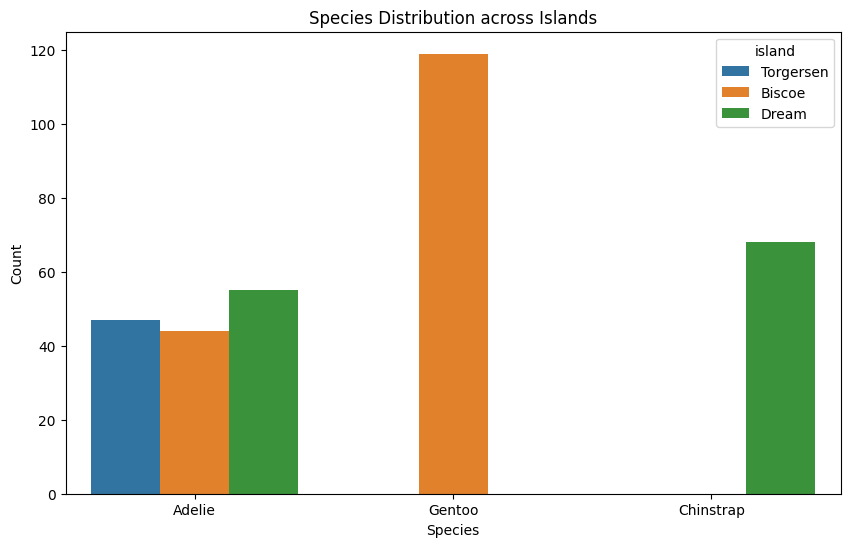

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='species', hue='island')
plt.title('Species Distribution across Islands')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

The observations suggest that -


1.   Species Adelie is present on every island
2.   The Gentoo species is just found on Biscoe island whilst Chinastrap is just found on Dream island



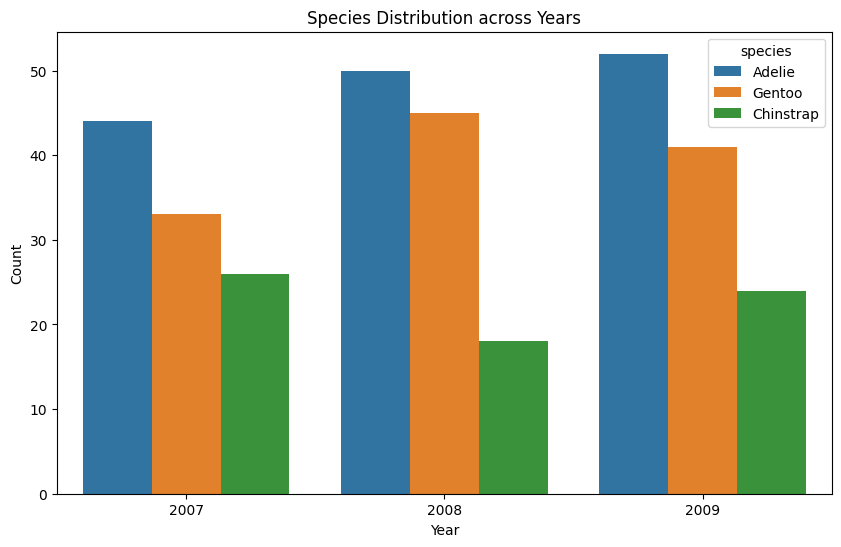

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', hue='species')
plt.title('Species Distribution across Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

The observations are -


1.   The count for Adelie keeps increasing every year by a certain amount
2.   The count for Gentoo increases in 2008 and then starts decreasing after that
3.   The count for Chinastrap decreases in 2008 and then starts increasing in 2009



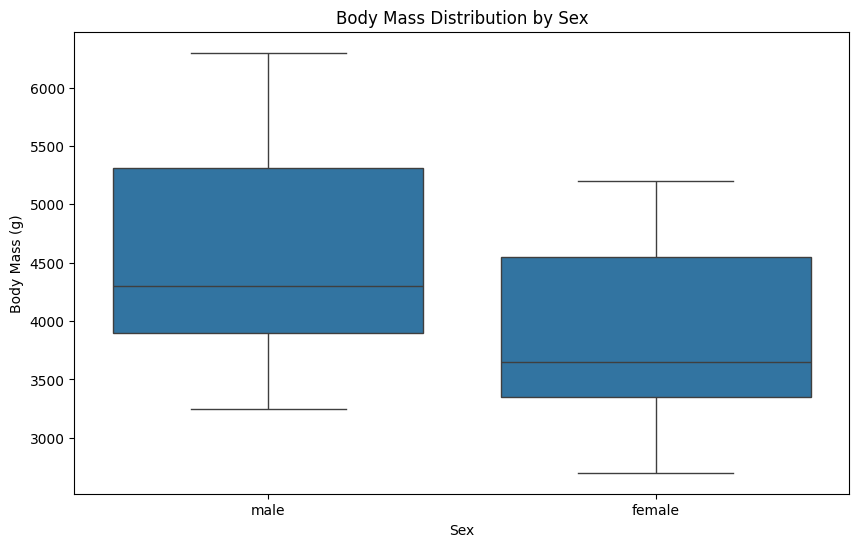

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='body_mass_g', data=df)
plt.title('Body Mass Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Body Mass (g)')
plt.show()

The observations are -


1.   Females have a lower body mass than males
2.   The spread for body mass for males is greater than that for females



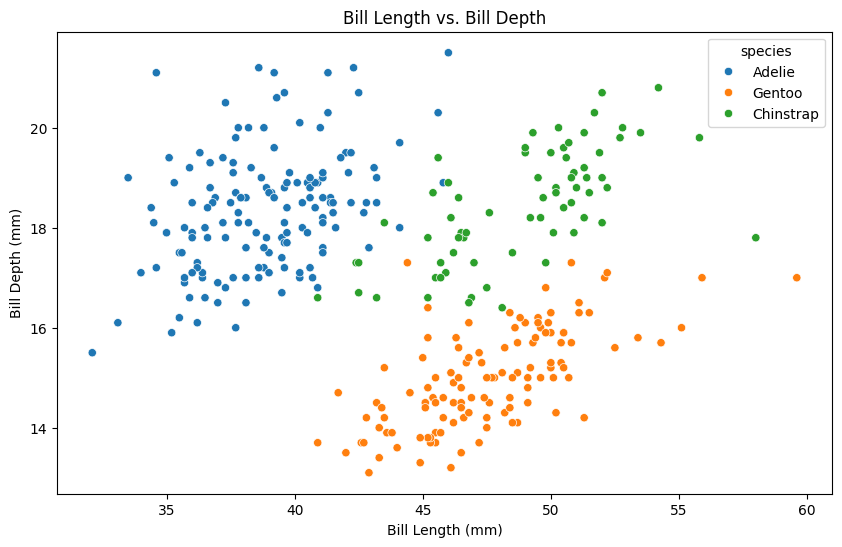

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df)
plt.title('Bill Length vs. Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

The observations are -


1.   The 3 species are separated distinctly and any new point added could be easily categorized
2.   There is a weak positive correlation between the two attributes



In [46]:
df_cleaned = df.drop(columns=['Unnamed: 0']).dropna()

In [47]:
X = df_cleaned.drop(columns=['species'])  # Features
y = df_cleaned['species']  # Target

In [48]:
X = pd.get_dummies(X, drop_first=True)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
mdl = DecisionTreeClassifier(random_state=42)
mdl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
y_pred = mdl.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

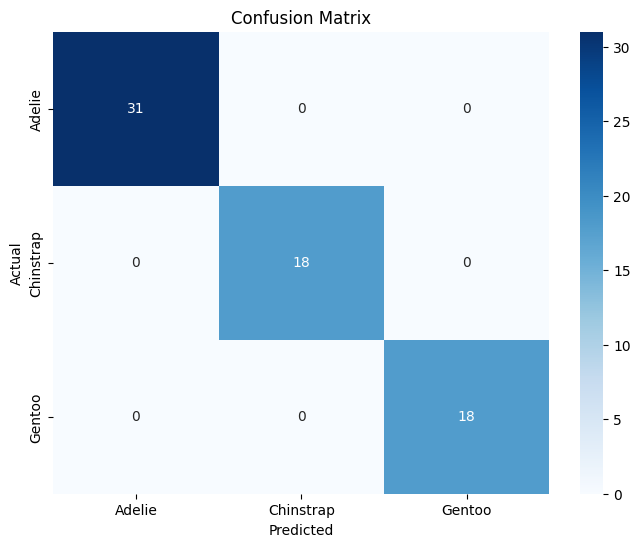

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



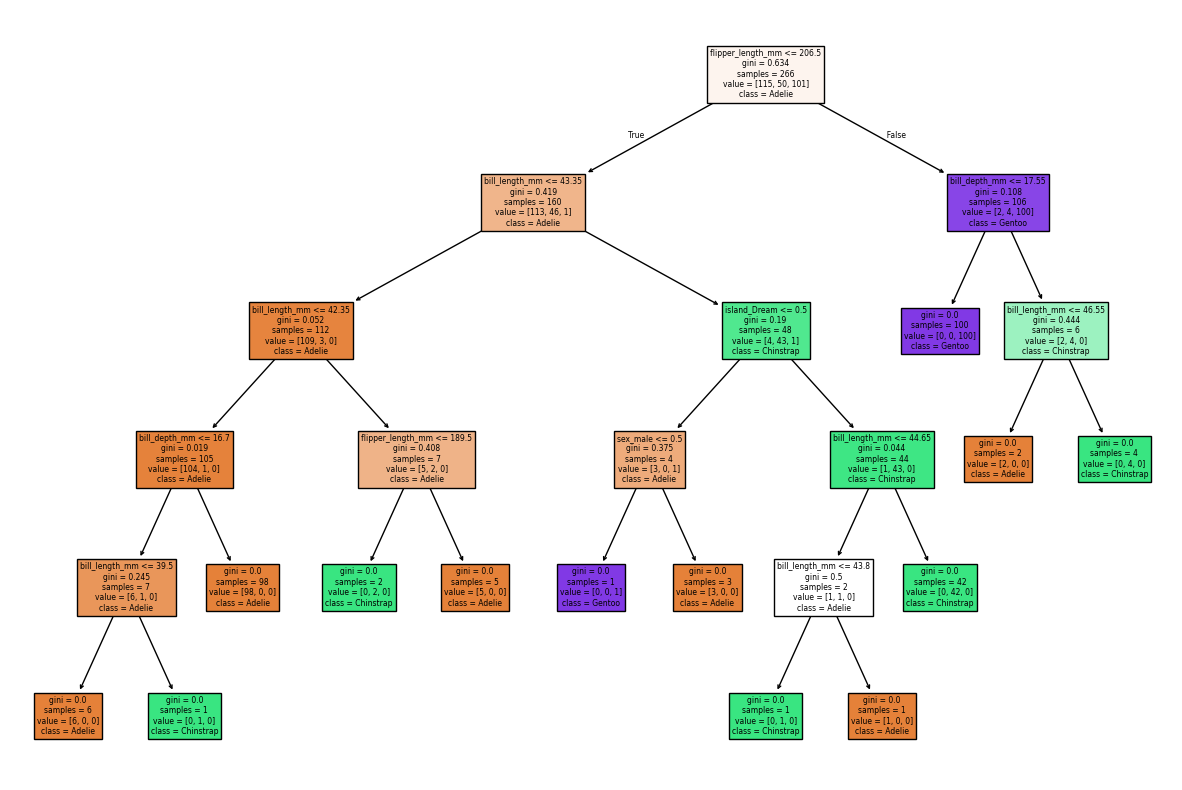

In [56]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(mdl, filled=True, feature_names=X.columns, class_names=np.unique(y))
plt.show()

In [57]:
import pickle

In [58]:
filename = 'species.pkl'
pickle.dump(mdl, open(filename, 'wb'))

from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>